In [1]:
# Insert path ---
import os
import sys
# Boolean aliases ----
T = True
F = False
# STL ----
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")
import networkx as nx
# Personal libs ---- 
from modules.hierarmerge import Hierarchy
from modules.hierarentropy import Hierarchical_Entropy
from modules.colregion import colregion
from various.data_transformations import maps
from networks.structure import MAC
from various.network_tools import *
from various.clustering_tools import discover_overlap_nodes
# Declare global variables ----
linkage_method = "single"
nlog10 = T 
lookup = F
prob = F
cut = F
structure = "FLN"
mode = "ZERO"
distance = "MAP3D"
nature = "original"
imputation_method = "GB"
topology = "MIX"
mapping = "trivial"
index  = "Hellinger2"
discovery = "discovery_7"
SCORE = "_S"
version = "29d91i"
__nodes__ = 91
__inj__ = "29i"

In [2]:
# Load structure ----
MAXIT = 15
best_levels = np.zeros((MAXIT-1, 2))
FLNe = np.zeros((MAXIT-1, __nodes__, __nodes__))
hierarchical_association = np.zeros((MAXIT-1, __nodes__, __nodes__))

In [3]:

for i in np.arange(1, MAXIT):
  NET = MAC[f"MAC{__inj__}"](
    linkage_method, mode,
    nlog10 = nlog10,
    structure = structure,
    lookup = lookup,
    version = version,
    nature = nature,
    model = imputation_method,
    distance = distance,
    imputation = imputation_method,
    iteration = i,
    inj = __inj__,
    topology = topology,
    index = index,
    mapping = mapping,
    cut = cut,
    discovery = discovery
  )
  # Transform data for analysis ----
  R, lookup, _ = maps[mapping](
    NET.A, nlog10, lookup, prob, b=0
  )
  FLNe[i-1, :, :] = R
  print("Compute Hierarchy")
  ## Hierarchy object!! ----
  H = Hierarchy(
    NET, NET.A, R, NET.D,
    __nodes__, linkage_method, mode, lookup=lookup, index=index
  )
  H.BH_features_cpp_no_mu()
  H.la_abre_a_merde_cpp(H.BH[0])
  # Set labels to network ----
  L = colregion(NET, labels_name=f"labels{__inj__}")
  H.set_colregion(L)
  H.delete_dist_matrix()

  # Get best K and R ----
  K, R, _ = get_best_kr_equivalence(SCORE, H)
  best_levels[i-1, 0] = K[0]
  best_levels[i-1, 1] = R[0]
  
  for z in np.arange(1, __nodes__):
    node_partition = cut_tree(H.Z, n_clusters=z).ravel().astype(int)
    communities = Counter(node_partition)
    communities = [k for k in communities.keys() if communities[k] > 1]
    for k in communities:
      nodes = np.where(node_partition == k)[0]
      x, y = np.meshgrid(nodes, nodes)
      x = x.ravel()
      y = y.ravel()
      keep = x != y
      x = x[keep]
      y = y[keep]
      hierarchical_association[i-1, x, y] = H.Z[__nodes__ - 1 - z, 2]

Compute Hierarchy
Compute link hierarchical agglomeration ----
Mu-free
Compute node hierarchy ----
Commencer: la abre a merde
25%
50%
75%
Voila, bon ami
Compute Hierarchy
Compute link hierarchical agglomeration ----
Mu-free
Compute node hierarchy ----
Commencer: la abre a merde
25%
50%
75%
Voila, bon ami
Compute Hierarchy
Compute link hierarchical agglomeration ----
Mu-free
Compute node hierarchy ----
Commencer: la abre a merde
25%
50%
75%
Voila, bon ami
Compute Hierarchy
Compute link hierarchical agglomeration ----
Mu-free
Compute node hierarchy ----
Commencer: la abre a merde
25%
50%
75%
Voila, bon ami
Compute Hierarchy
Compute link hierarchical agglomeration ----
Mu-free
Compute node hierarchy ----
Commencer: la abre a merde
25%
50%
75%
Voila, bon ami
Compute Hierarchy
Compute link hierarchical agglomeration ----
Mu-free
Compute node hierarchy ----
Commencer: la abre a merde
25%
50%
75%
Voila, bon ami
Compute Hierarchy
Compute link hierarchical agglomeration ----
Mu-free
Compute nod

In [4]:
D = np.mean(hierarchical_association, axis=0)

[Text(0, 0.5, '10'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '24c'),
 Text(0, 3.5, '46d'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '7a'),
 Text(0, 6.5, '7b'),
 Text(0, 7.5, '7m'),
 Text(0, 8.5, '8b'),
 Text(0, 9.5, '8l'),
 Text(0, 10.5, '8m'),
 Text(0, 11.5, '9/46d'),
 Text(0, 12.5, '9/46v'),
 Text(0, 13.5, 'dp'),
 Text(0, 14.5, 'f1'),
 Text(0, 15.5, 'f2'),
 Text(0, 16.5, 'f5'),
 Text(0, 17.5, 'f7'),
 Text(0, 18.5, 'mt'),
 Text(0, 19.5, 'pbr'),
 Text(0, 20.5, 'prom'),
 Text(0, 21.5, 'stpc'),
 Text(0, 22.5, 'stpi'),
 Text(0, 23.5, 'stpr'),
 Text(0, 24.5, 'teo'),
 Text(0, 25.5, 'tepd'),
 Text(0, 26.5, 'v1'),
 Text(0, 27.5, 'v2'),
 Text(0, 28.5, 'v4'),
 Text(0, 29.5, '1'),
 Text(0, 30.5, '25'),
 Text(0, 31.5, '3'),
 Text(0, 32.5, '32'),
 Text(0, 33.5, '45a'),
 Text(0, 34.5, '9'),
 Text(0, 35.5, 'f3'),
 Text(0, 36.5, 'f4'),
 Text(0, 37.5, 'lip'),
 Text(0, 38.5, 'opro'),
 Text(0, 39.5, 'v6'),
 Text(0, 40.5, '11'),
 Text(0, 41.5, '12'),
 Text(0, 42.5, '13'),
 Text(0, 43.5, '14'),
 Text(0, 44.5, '23'),
 

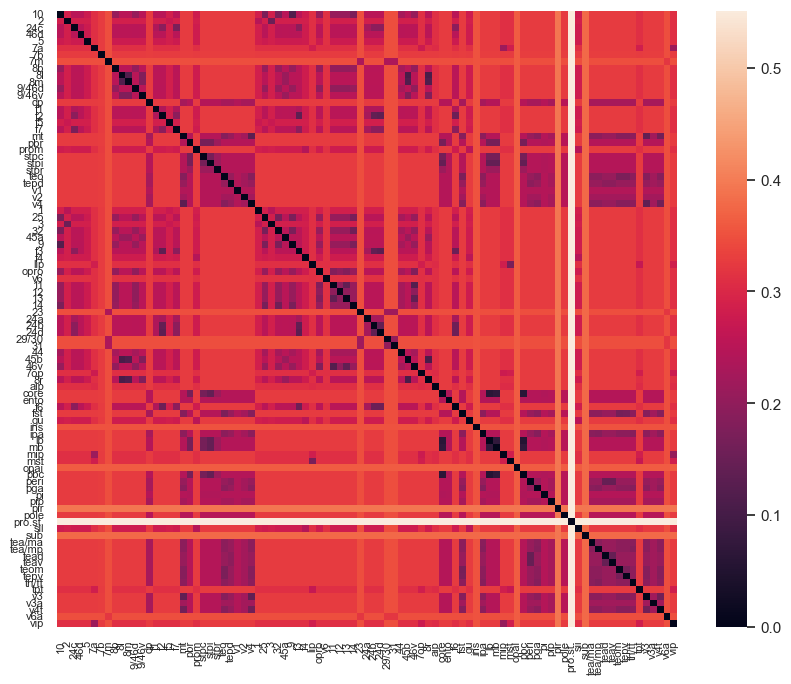

In [5]:
_, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(
  D,
  xticklabels=NET.struct_labels,
  yticklabels=NET.struct_labels,
  ax=ax
)

ax.set_xticklabels(
  ax.get_xmajorticklabels(), fontsize = 8
)
ax.set_yticklabels(
  ax.get_ymajorticklabels(), fontsize = 8
)

In [6]:
Z = linkage(squareform(D))

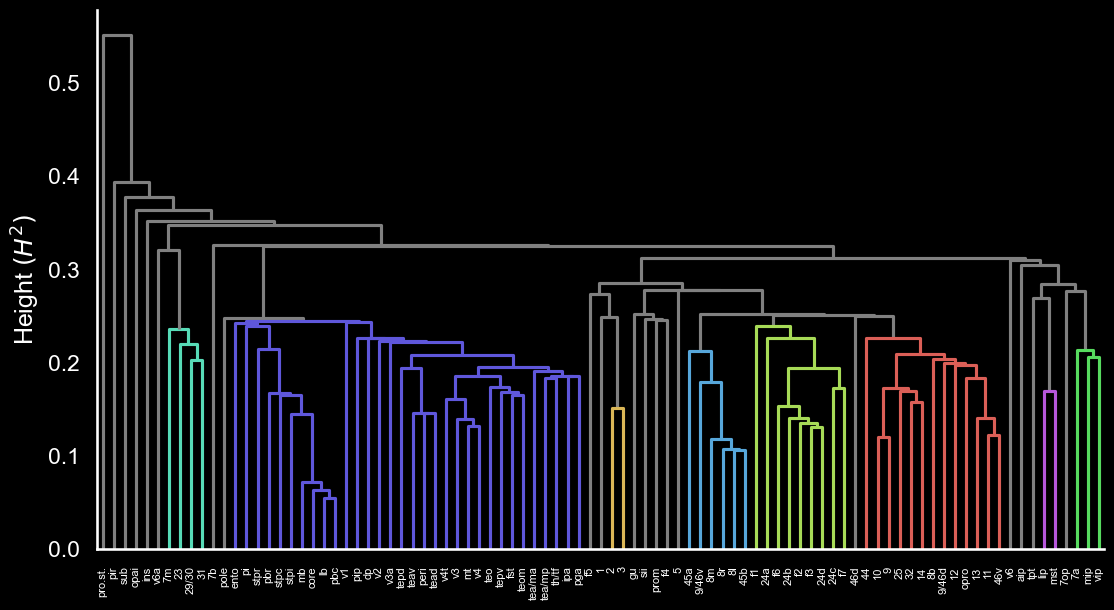

In [7]:
def core_dendrogram(Z, R : list, labels, cmap_name="hls", leaf_font_size=20, remove_labels=False, **kwargs):
  from scipy.cluster import hierarchy
  import matplotlib.colors
  # Create figure ----
  for r in R:
    if r == 1:
      r += 1
    partition = hierarchy.cut_tree(Z, r).ravel()
    new_partition = skim_partition(partition)
    unique_clusters_id = np.unique(new_partition)
    cm = sns.color_palette(cmap_name, len(unique_clusters_id))
    # dlf_col = "#808080"
    dlf_col = "#808080"
    ##
    D_leaf_colors = {}
    for i, _ in enumerate(labels):
      if new_partition[i] != -1:
        D_leaf_colors[i] = matplotlib.colors.to_hex(cm[new_partition[i]])
      else: D_leaf_colors[i] = dlf_col
    ##
    link_cols = {}
    for i, i12 in enumerate(Z[:,:2].astype(int)):
      c1, c2 = (link_cols[x] if x > len(Z) else D_leaf_colors[x]
        for x in i12)
      link_cols[i+1+len(Z)] = c1 if c1 == c2 else dlf_col
    plt.style.use("dark_background")
    sns.set_context("talk")
    fig, ax = plt.subplots(1, 1)
    ax.grid(False)
    if not remove_labels:
      hierarchy.dendrogram(Z,
        labels=labels,
        color_threshold=Z[len(labels) - r, 2],
        link_color_func = lambda k: link_cols[k],
        leaf_rotation=90, leaf_font_size=leaf_font_size, **kwargs
      )
    else:
      hierarchy.dendrogram(Z,
        no_labels=True,
        color_threshold=Z[len(labels) - r, 2],
        link_color_func = lambda k: link_cols[k]
      )
    fig.set_figwidth(13)
    fig.set_figheight(7)
    plt.ylabel("Height " + r"$(H^{2})$")
    sns.despine()

core_dendrogram(Z, [28], NET.struct_labels, leaf_font_size=8)

In [8]:
print(np.mean(best_levels[:, 1]))

28.357142857142858


In [19]:
flne = np.mean(FLNe, axis=0)[:, :29]
min_flne = np.nanmin(flne[flne > 0])
print(min_flne)

flne = np.mean(FLNe, axis=0)
flne[flne < min_flne] = 0

1.2661769938172546e-06


In [10]:
def plot_network_covers(R, partition, nocs : dict, sizes : dict, labels, ang=0, score="", direction="", cmap_name="hls", figsize=(12,12), spring=False, **kwargs):
  print("Printing network space")
  import matplotlib.patheffects as path_effects
  # Skim partition ----
  unique_clusters_id = np.unique(partition)
  keff = len(unique_clusters_id)
  # Generate all the colors in the color map -----
  if -1 in unique_clusters_id:
    save_colors = sns.color_palette(cmap_name, keff - 1)
    cmap_heatmap = [[]] * keff
    cmap_heatmap[0] = [199 / 255.0, 0, 57 / 255.0]
    cmap_heatmap[1:] = save_colors
  else:
    save_colors = sns.color_palette(cmap_name, keff)
    cmap_heatmap = [[]] * (keff+1)
    cmap_heatmap[0] = [199 / 255.0, 0, 57 / 255.0]
    cmap_heatmap[1:] = save_colors
  # Assign memberships to nodes ----
  if -1 in unique_clusters_id:
    nodes_memberships = {
      k : {"id" : [0] * keff, "size" : [0] * keff} for k in np.arange(len(partition))
    }
  else:
    nodes_memberships = {
      k : {"id" : [0] * (keff+1), "size" : [0] * (keff+1)} for k in np.arange(len(partition))
    }
  for i, id in enumerate(partition):
    if id == -1: continue
    nodes_memberships[i]["id"][id + 1] = 1
    nodes_memberships[i]["size"][id + 1] = 1
  for i, key in enumerate(nocs.keys()):
    index_key = np.where(labels == key)[0][0]
    for id in nocs[key]:
      if id == -1:
        nodes_memberships[index_key]["id"][0] = 1
        nodes_memberships[index_key]["size"][0] = 1
      else:
        nodes_memberships[index_key]["id"][id + 1] = 1
        nodes_memberships[index_key]["size"][id + 1] = sizes[key][id]
  # Check unassigned ----
  for i in np.arange(len(labels)):
    if np.sum(np.array(nodes_memberships[i]["id"]) == 1) == 0:
      nodes_memberships[i]["id"][0] = 1
      nodes_memberships[i]["size"][0] = 1
  # Generate graph ----
  G = nx.from_numpy_array(R, create_using=nx.DiGraph)
  if "coords" not in kwargs.keys():
    pos = nx.kamada_kawai_layout(G, weight="weight")
    if spring:
      Ginv = nx.DiGraph(R)
      pos = nx.spring_layout(Ginv, weight="weight", pos=pos, iterations=5, seed=212)
  else:
    pos = kwargs["coords"]
  ang = ang * np.pi/ 180
  rot = np.array([[np.cos(ang), np.sin(ang)],[-np.sin(ang), np.cos(ang)]])
  pos = {k : np.matmul(rot, pos[k]) for k in pos.keys()}
  labs = {k : lab for k, lab in zip(G.nodes, labels)}

  mu_pos_x = np.mean([k[0] for k in pos.values()])
  mu_pos_y = np.mean([k[1] for k in pos.values()])
  mu_pos = np.array([mu_pos_x, mu_pos_y])

  pos = {k : pos[k] - mu_pos for k in pos.keys()}
  pos = {k : pos[k] * 1.5 for k in pos.keys()}
  
  _, ax = plt.subplots(1, 1, figsize=figsize)
  if "not_edges" not in kwargs.keys():
    nx.draw_networkx_edges(
      G, pos=pos, edge_color="#666666", alpha=0.5, width=2, arrowsize=10, connectionstyle="arc3,rad=-0.1",
      node_size=1400, ax=ax
    )
  if "modified_labels" not in kwargs.keys():
    t = nx.draw_networkx_labels(G, pos=pos, labels=labs, font_color="white", ax=ax)
    for key in t.keys():
      t[key].set_path_effects(
      [
        path_effects.Stroke(linewidth=1, foreground='black'),
        path_effects.Normal()
      ]
    )
  else:
    t = nx.draw_networkx_labels(G, pos=pos, labels=kwargs["modified_labels"], font_color="white", ax=ax)
    for key in t.keys():
      t[key].set_path_effects(
      [
        path_effects.Stroke(linewidth=1, foreground='black'),
        path_effects.Normal()
      ]
    )

  for node in G.nodes:
    a = plt.pie(
      [s for s in nodes_memberships[node]["size"] if s != 0], # s.t. all wedges have equal size
      center=pos[node],  
      colors = [cmap_heatmap[i] for i, id in enumerate(nodes_memberships[node]["id"]) if id != 0],
      radius=0.08
    )
    for i in range(len(a[0])):
      a[0][i].set_alpha(0.8)
  array_pos = np.array([list(pos[v]) for v in pos.keys()])
  plt.xlim(-0.05 + np.min(array_pos, axis=0)[0], np.max(array_pos, axis=0)[0] + 0.05)
  plt.ylim(-0.05 + np.min(array_pos, axis=0)[1], np.max(array_pos, axis=0)[1] + 0.05)

In [24]:
import ctools as ct
source_sim = np.zeros((NET.nodes, NET.nodes))
target_sim = np.zeros((NET.nodes, NET.nodes))

for i in np.arange(NET.nodes):
  for j in np.arange(i+1, NET.nodes):
    source_sim[i, j] = ct.Hellinger2(flne[i, :], flne[j, :], i, j)
    source_sim[j, i] = source_sim[i, j]
    target_sim[i, j] = ct.Hellinger2(flne[:, i], flne[:, j], i, j)
    target_sim[j, i] = target_sim[i, j]


	Areas with predicted overlapping communities:
 {'46d': [0, 5], '5': [2, 3, 4], 'v6': [3, 6], 'gu': [0, 1], 'ins': [1, 2, 7], 'pole': [0, 6], 'pro.st.': [3, 4, 7], 'v6a': [3, 4, 7]} 

Printing network space

	Areas with predicted overlapping communities:
 {'5': [2, 3], '7b': [3, 7], 'f4': [1, 2], '7op': [1, 3], 'gu': [1, 5], 'ins': [2, 3, 4, 5], 'opai': [0, 5], 'pro.st.': [3, 4, 7], 'sub': [3, 6], 'v6a': [3, 4, 7]} 

Printing network space

	Areas with predicted overlapping communities:
 {'46d': [0, 5], '5': [2, 3, 4], '7b': [1, 3, 7], 'f4': [1, 2], 'v6': [3, 6], '7op': [1, 3], 'aip': [1, 3], 'gu': [0, 1, 5], 'ins': [1, 2, 3, 4, 5, 7], 'opai': [0, 5], 'pir': [5, 6], 'pole': [0, 6], 'pro.st.': [3, 4, 7], 'sub': [3, 6], 'v6a': [3, 4, 7]} 

Printing network space


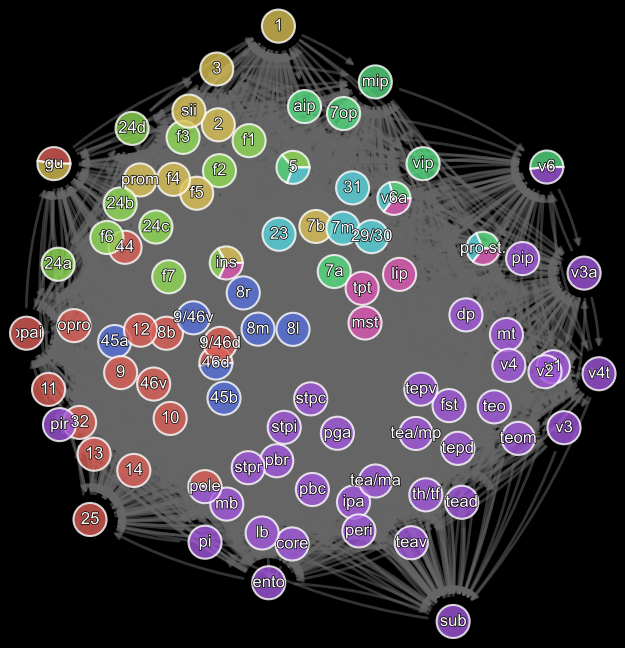

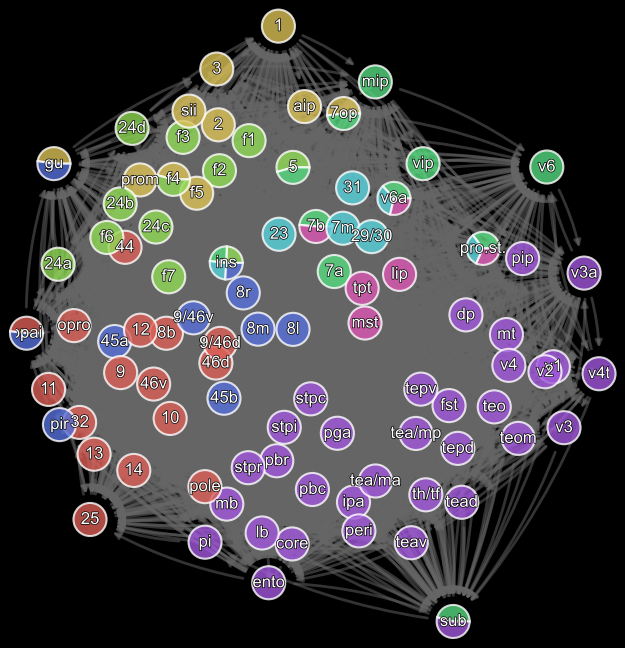

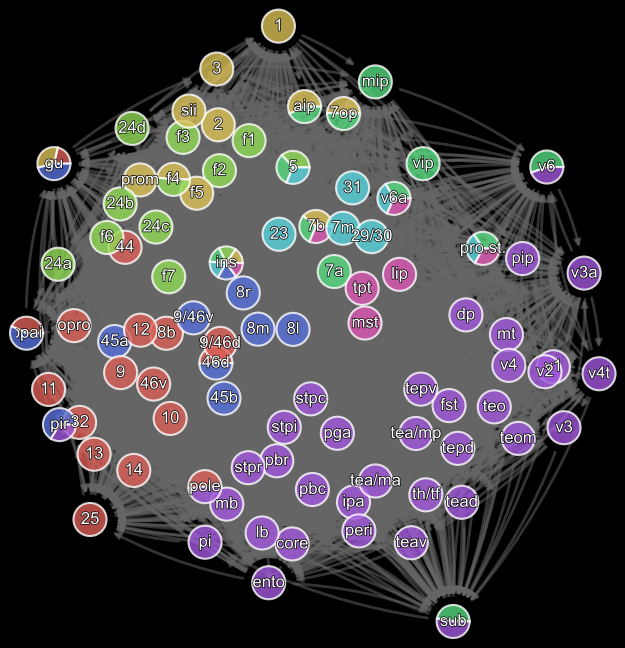

In [28]:
plt.style.use("dark_background")
rlabels = cut_tree(Z, n_clusters=28).ravel()
rlabels = skim_partition(rlabels)
A = flne[:__nodes__, :].copy()
A[A > 0] = -np.log(A[A > 0])
np.fill_diagonal(A, 0)

for direction in ["source", "target", "both"]:
  _, data_nocs, noc_sizes, rlabels2  = discover_overlap_nodes(flne, np.sqrt(1-source_sim), np.sqrt(1-target_sim), rlabels, H.colregion.labels[:H.nodes], direction=direction)
  print("\n\tAreas with predicted overlapping communities:\n",  data_nocs, "\n")
  cover = omega_index_format(rlabels2,  data_nocs, NET.struct_labels[:NET.nodes])

  # Netowk ----
  plot_network_covers(
    A, rlabels2,
    data_nocs, noc_sizes, H.colregion.labels[:H.nodes],
    score=SCORE, direction="both", cmap_name="hls", figsize=(8,8)
  )

In [29]:
s = Hierarchical_Entropy(Z, H.nodes, H.colregion.labels[:H.nodes])
s.Z2dict("short")
treeh = s.zdict2newick(s.tree, weighted=T)

Print hierarchy newicks
(((((((((((((((((((10:0.002128933823751969,9:0.002128933823751969):0.05239454208875363,((32:0.004458044236048175,14:0.004458044236048175):0.011940329605589245,25:0.00039825320269831765):0.002921057500336388):0.03619971753840337,((((((11:0.002372138212538663,46v:0.002372138212538663):0.017311796584654995,13:0.0006955812933119032):0.04302199849858396,opro:9.505024032216425e-05):0.013966845888143536,12:0.0014061550651873478):0.0026450245270753237,9/46d:0.0026450245270753237):0.003977374737901468,8b:0.0010405630399707155):0.0052990811782590574):0.017593157516910762,44:0.0):0.02373545824801379,46d:0.001002056533542517):0.0007278436163044022,((((24c:0.0024256595927119318,f7:0.0024256595927119318):0.022168288100625544,((((f3:0.008552424970679165,24d:0.008552424970679165):0.0043902970000178065,f2:0.0037687651441208614):0.00442349489187302,24b:5.442027791499604e-05):0.013336755671671169,f6:0.001640435594387396):0.040992321534974896):0.032119984862313045,24a:5.84034446732

In [30]:
def plot_newick(newick : str, colregion, width=8, height=7, fontsize=10, branches_color="#666666"):
  from Bio import Phylo
  from io import StringIO
  tree = Phylo.read(StringIO(newick), "newick")
  tree.ladderize()
  
  plt.style.use("dark_background")
  sns.set_context("talk")
  _, ax = plt.subplots(1, 1, figsize=(width, height))
  
  ax.grid(False)
  area = colregion.regions.AREA.to_numpy().astype(str)
  color = colregion.regions.COLOR.to_numpy()
  color_tip = {k: v for k, v in zip(area, color)}
  Phylo.draw(
    tree, axes=ax, label_colors=color_tip,
    do_show=False, fontsize=fontsize, branches_color=branches_color
  )
  ax.set_ylabel("")
  ax.yaxis.set_tick_params(labelleft=False)

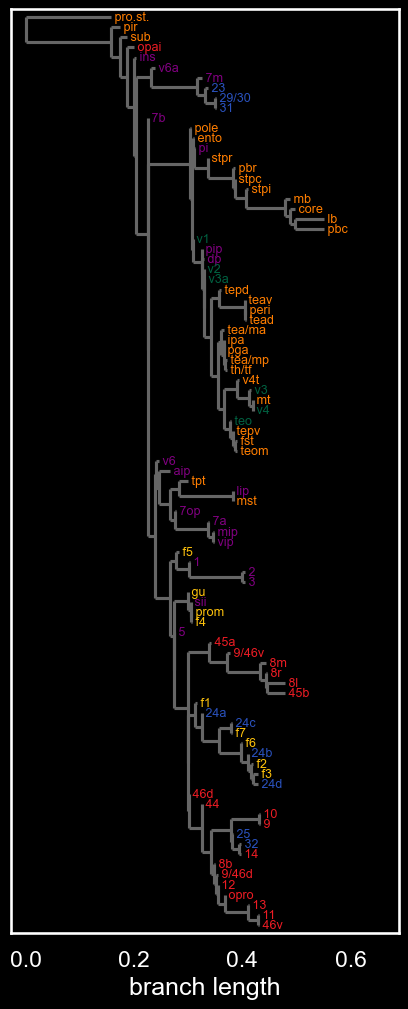

In [31]:
plot_newick(treeh, H.colregion, width=5, height=12, fontsize=9)